In [53]:
import pandas as pd
import numpy as np

In [54]:
CEC = pd.read_csv('./data/Energy_Commission_Power_Plant_ID_Cross_Reference_Table_2021_ADA.csv')
PowerPlant = pd.read_csv('./data/California_Power_Plants(1).csv')
Node = pd.read_csv('./data/ATL_FNM_MAPPING_DATA_GRP_CISO_AS_22M7_DB114_v5.csv')

### Method
1. Map Node file to Energy Commision Powerplant ID by ResourceID
2. Map Resource ID to Node

In [55]:
CEC

,CECPlantID,PlantName,EIAPlantID,ResourceID,Resource ID Name,Energy Source Category,City,County,State
0,B0001,Vaca Dixon Battery Storage,59256.0,VACADX_1_NAS,NaN,BATTERY,Vacaville,Solano,CA
1,B0002,Tehachapi Storage Project,59661.0,MONLTH_6_BATTRY,Tehachapi Storage Project,BATTERY,Tehachapi,Kern,CA
2,B0003,Yerba Buena Battery,59257.0,SWIFT_1_NAS,NaN,BATTERY,San Jose,Santa Clara,CA
3,B0004,Millikan Avenue BESS,60760.0,SANTGO_2_MABBT1,Millikan Avenue BESS,BATTERY,Irvine,Orange,CA
4,B0005,Mira Loma BESS A,60661.0,MIRLOM_2_MLBBTA,Mira Loma BESS A,BATTERY,Ontario,San Bernardino,CA
...,...,...,...,...,...,...,...,...,...
1864,W0479,"Coachella Wind Holdings, LLC",64323.0,ALTWD_2_COAWD1,Coachella 1,WIND,Desert Hot Springs,Riverside,CA
1865,W0480,"Oasis Alta, LLC",63941.0,VOYAGR_2_VOAWD5,Voyager Wind Oasis Alta,WIND,Mojave,Kern,CA
1866,W0481,Point Wind,63482.0,TEHAPI_2_PW1WD1,Point Wind 1,WIND,Tehachapi,Kern,CA
1867,W0482,Altamont Winds LLC,64326.0,NaN,NaN,WIND,Livermore,Alameda,CA


In [56]:
PowerPlant

,X,Y,OBJECTID,CECPlantID,PlantName,EIAPlantID,RPS_Eligible,SmallPlant,Peaker,Small_Hydro,...,Capacity_Latest,Units,PriEnergySource,LastReportedYear,Lon_WGS84,Lat_WGS84,Annual_Hyperlink,Monthly_Hyperlink,Elevation,Elevation_ft
0,-117.203324,32.702360,1,G0986,Backup Generation - Navy Regional Data Automat...,101694,0,1,0,0,...,0.00,NaN,NaN,2013.0,-117.203336,32.702364,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,9.515228,31.217940
1,-117.197978,32.727161,2,G1017,Sheraton San Diego East Tower (shutdown August...,57592,0,1,0,0,...,0.00,NaN,NaN,2014.0,-117.197989,32.727166,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,4.616023,15.144432
2,-117.196758,32.748692,3,S0400,USMC Maintenance Officer,MISSING,1,1,0,0,...,1.53,1,SUN,2021.0,-117.196770,32.748697,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,4.163409,13.659478
3,-117.207502,32.731351,4,S0401,San Diego City Regional Airport Authority,MISSING,1,1,0,0,...,1.60,1,SUN,2021.0,-117.207514,32.731356,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,4.297532,14.099514
4,-117.245805,32.677448,5,E0171,Point Loma Wastewater Treatment Plant - Gas Ut...,50492,1,1,0,0,...,5.00,"1, 2",OBG,2021.0,-117.245817,32.677453,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,38.975610,127.872736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,-122.376937,41.434305,1855,E0243,Roseburg Forest Products (Weed Cogeneration Pl...,56469,1,0,0,0,...,13.41,Turbine,OBS,2021.0,-122.376950,41.434311,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...,1077.075000,3533.710635
1855,-122.335337,41.978911,1856,H0111,Copco 1,294,1,0,0,1,...,20.00,"1, 2",WAT,2021.0,-122.335351,41.978917,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...,761.587900,2498.647970
1856,-122.358068,41.975699,1857,H0112,Copco 2,295,1,0,0,1,...,27.00,"1, 2",WAT,2021.0,-122.358082,41.975704,https://repository.energy.ca.gov/powerplantsge...,https://repository.energy.ca.gov/powerplantsge...,712.247800,2336.771001
1857,-122.360387,41.985587,1858,H0177,Fall Creek,296,1,1,0,1,...,2.20,"1, 2, 3",WAT,2021.0,-122.360401,41.985593,https://repository.energy.ca.gov/powerplantsge...,https://caenergy.maps.arcgis.com/sharing/rest/...,770.525600,2527.971132


In [57]:
Node

,AS_ID,RES_TYPE,RES_ID,PNODE_ID,BUS_ID,FNMVERSION,RELEASE_DATE,GROUP
0,AS_SP15,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1
1,AS_NP26,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1
2,AS_SP15,LOAD,7STDRD_7_LD1,0096WD_7_N002,35009_0096_WD _21.6_LD1,22M7_DB114,2022-07-28T00:00:00,2
3,AS_NP26,LOAD,7STDRD_7_LD1,0096WD_7_N002,35009_0096_WD _21.6_LD1,22M7_DB114,2022-07-28T00:00:00,2
4,AS_SP26_EXP,TIE,83MB230,MIDWYGN_7_N002,21673_MIDWY GN_34.5_GUS1,22M7_DB114,2022-07-28T00:00:00,3
...,...,...,...,...,...,...,...,...
10775,AS_NP26,LOAD,ZENO_6_LD-T1,ZENO_6_N001,36891_Zeno _60.0_LD1,22M7_DB114,2022-07-28T00:00:00,5375
10776,AS_NP26,LOAD,ZENO_6_LD-T2,ZENO_6_N002,36891_Zeno _60.0_LD2,22M7_DB114,2022-07-28T00:00:00,5376
10777,AS_NP15,LOAD,ZENO_6_LD-T2,ZENO_6_N002,36891_Zeno _60.0_LD2,22M7_DB114,2022-07-28T00:00:00,5376
10778,AS_NP15,GEN,ZOND_6_UNIT,ZONDWD_6_B1,35204_ZONDWD _60.0_GU1,22M7_DB114,2022-07-28T00:00:00,5377


In [58]:
columns = Node.columns
nodes_arr = Node.to_numpy()
cec_arr = CEC.to_numpy()
new_nodes = np.zeros((nodes_arr.shape[0],nodes_arr.shape[1]+1),dtype=object)
print(new_nodes.shape)

for i in range(nodes_arr.shape[0]):
    for cec in cec_arr:
        if(cec[3]==nodes_arr[i][2]):
            new_nodes[i][:-1] = nodes_arr[i]
            new_nodes[i][-1] = cec[0]

    if new_nodes[i][-1]==0: 
        new_nodes[i][:-1] = nodes_arr[i]
        new_nodes[i][-1] = 'NaN'
    
#     print(new_nodes[i])

# print(new_nodes)

(10780, 9)


In [59]:
plant = np.zeros((CEC.shape[0],new_nodes.shape[1]),dtype=object)
i = 0;
for node in new_nodes:
    if(node[-1]!='NaN'):
#         print(node)
        plant[i] = node;
        i += 1
    
# pd.DataFrame(new_nodes)

In [60]:
# Crop off
plant = plant[:i]

In [66]:
# Map x,y
newdata = 3
complete = np.zeros((CEC.shape[0],new_nodes.shape[1]+newdata),dtype=object)
i = 0
count = 0

enerSourceIdx = -8

for i in range(plant.shape[0]):
    for a in PowerPlant.to_numpy():
        if(a[3]==plant[i][-1]):
#             print(p)
#             print(complete[i][:-1].shape)
            complete[i][0:-newdata] = plant[i]
    
            # Long Lat
            if(a[enerSourceIdx]=='None'):
                a[enerSourceIdx]='NA'
                
            complete[i][-newdata] = a[enerSourceIdx]
            complete[i][-2] = a[0]
            complete[i][-1] = a[1]
            count += 1
                 
            # Energy Source
            
    
    if complete[i][-1]==0: 
        
        complete[i][0:-newdata] = plant[i]
        complete[i][-2] = 'NaN'
        complete[i][-1] = 'NaN'

print(complete)

[['AS_SP15' 'GEN' '7STDRD_1_SOLAR1' ... 'SUN' -119.126866276
  35.4504790500001]
 ['AS_NP26' 'GEN' '7STDRD_1_SOLAR1' ... 'SUN' -119.126866276
  35.4504790500001]
 ['AS_SP26' 'GEN' 'ACACIA_6_SOLAR' ... 'SUN' -118.327813305 34.693482073]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [67]:
final = pd.DataFrame(complete[0:count])
final

,0,1,2,3,4,5,6,7,8,9,10,11
0,AS_SP15,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,SUN,-119.126866,35.450479
1,AS_NP26,GEN,7STDRD_1_SOLAR1,0096WD_7_N001,35009_0096_WD _21.6_GUWD,22M7_DB114,2022-07-28T00:00:00,1,S0330,SUN,-119.126866,35.450479
2,AS_SP26,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,SUN,-118.327813,34.693482
3,AS_SP15,GEN,ACACIA_6_SOLAR,ACACIA_7_N001,29876_ACACIA _34.5_GU1,22M7_DB114,2022-07-28T00:00:00,5,S0318,SUN,-118.327813,34.693482
4,AS_NP26,GEN,ADERA_1_SOLAR1,ADERAG1_7_N001,34117_ADERA G1_34.5_GU1,22M7_DB114,2022-07-28T00:00:00,7,S0421,SUN,-120.323967,37.121042
...,...,...,...,...,...,...,...,...,...,...,...,...
1697,AS_NP26,GEN,WOLFSK_1_UNITA1,WOLFSKIL_7_B1,32185_WOLFSKIL_13.8_GU1,22M7_DB114,2022-07-28T00:00:00,5325,G0913,NG,-122.075155,38.228095
1698,AS_NP26,GEN,WOODWR_1_HYDRO,WDWRGEN_7_N002,34449_WDWR GEN_21.6_GUH1,22M7_DB114,2022-07-28T00:00:00,5329,H0626,WAT,-119.70709,37.002469
1699,AS_NP15,GEN,WOODWR_1_HYDRO,WDWRGEN_7_N002,34449_WDWR GEN_21.6_GUH1,22M7_DB114,2022-07-28T00:00:00,5329,H0626,WAT,-119.70709,37.002469
1700,AS_NP15,GEN,WRGHTP_7_AMENGY,WRGHTPP_6_N002,34272_WRGHT PP_70.0_GUM1,22M7_DB114,2022-07-28T00:00:00,5336,H0455,NaN,-120.932657,35.555158


In [73]:
theCol = np.asarray(columns)
theCol = np.append(theCol,'CEC Plant ID')
theCol = np.append(theCol,'Energy_Source')
theCol = np.append(theCol,'Lng')
theCol = np.append(theCol,'Lat')
final = pd.DataFrame(complete[0:count],columns=theCol)

In [74]:
final
final.to_csv('powerplant_location.csv')

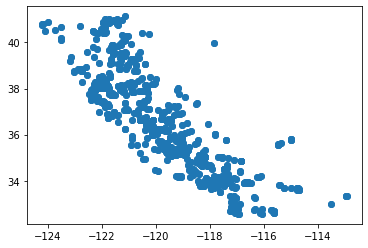

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x=final['Lng'], y=final['Lat'])
plt.show()